This notebook simulates a simplified version of the game of roulette.  The goal is to understand the various ways in which risk attitudes and value functions might make the game attractive to an individual.

In [1]:
import numpy
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed,FloatSlider,IntSlider


%matplotlib inline


In [2]:
def roulette_spin():
    npockets=[18,18,2]  # black, red, green
    roll=numpy.random.random_integers(0,numpy.sum(npockets)-1)
    if roll<npockets[0]:
        color=0
    elif roll<numpy.sum(npockets[:2]):
        color=0
    else:
        color=2
    return roll,color

Expected value of $1 bet = p(outcome)*u(outcome) = $-0.05
Mean outcome over 100 bets (on $1.00 bet): $-9.35 (range: $-100.00 - $285.00)


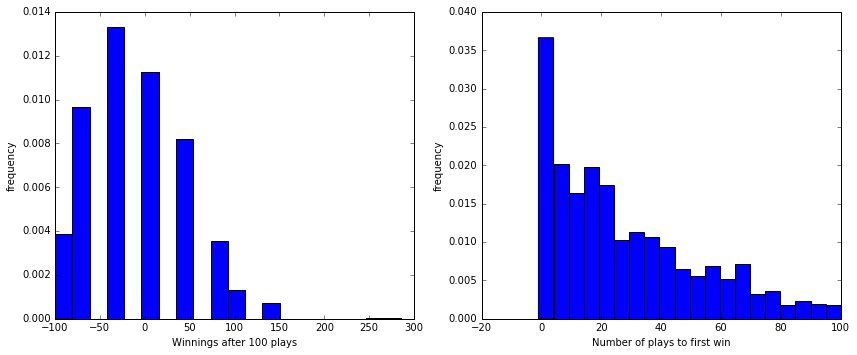

In [3]:
outcome=[]
first_win=[]

bet_value=1
bet=0  # bet on specific pocket every time - 35X payoff
payoff=35
nruns=1000
nplays=100 # how many games played at one sitting
p_payoff=1/38.

print('Expected value of $1 bet = p(outcome)*u(outcome) = $%0.2f'%float(-1*bet_value*(1-p_payoff) + payoff*p_payoff))

for i in range(nruns):
    o=[]
    fw=-1
    for j in range(nplays):
        r,c=roulette_spin()
        if payoff==r and fw<0:
            fw=j+1
        o.append(payoff*bet_value*(payoff==r) - bet_value)
    first_win.append(fw)
    outcome.append(numpy.sum(o))
print('Mean outcome over %d bets (on $%0.2f bet): $%0.2f (range: $%0.2f - $%0.2f)'%(nplays,
                bet_value,numpy.mean(outcome),numpy.min(outcome),numpy.max(outcome)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
_=plt.hist(outcome,20,normed=True)
plt.ylabel('frequency')
plt.xlabel('Winnings after %d plays'%nplays)
plt.subplot(1,2,2)
_=plt.hist(first_win,20,normed=True)
plt.ylabel('frequency')
plt.xlabel('Number of plays to first win')

plt.tight_layout()


Now let's see how change in the utilty function and probability weighting function change the attractiveness of the bet.  We use a power utility function and a one-parameter (Prelec) weighting function.  Default values are from Table 11.3 in the Fox & Poldrack Neuroeconomics chapter

In [4]:
def pi(p,gamma):
    assert gamma > 0 and gamma <= 1
    return numpy.exp(-1*(-1*numpy.log(p))**gamma)
    

Expected value of $100 bet = $-29.20


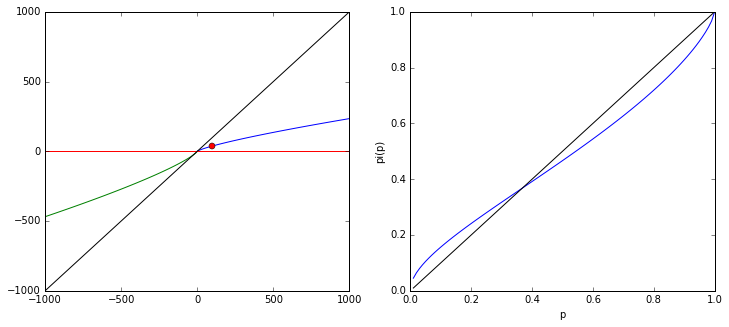

In [5]:
bet_max=1000

def plot_prob_weighting(alpha,gamma,bet_value,lam):
    beta=alpha # use same weighting for gains and losses
    p=numpy.linspace(0.01,1,99)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    o=numpy.linspace(0,bet_max,100)
    v_o=o**alpha
    plt.plot(o,v_o)
    plt.plot(-1*o,-1*v_o*lam)

    plt.axis([-1*bet_max,bet_max,-1*bet_max,bet_max])
    plt.plot(o,o,color='black')
    plt.plot([-1*bet_max,bet_max],[0,0])
    plt.plot(-1*o,-1*o,color='black')

    plt.plot(bet_value,bet_value**alpha,marker='o',color='red')

    plt.subplot(1,2,2)
    plt.plot(p,pi(p,gamma))
    plt.plot(p,p,color='black')
    plt.axis([0,1,0,1])
    plt.xlabel('p')
    plt.ylabel('pi(p)')
    payoff=35*bet_value
    p_payoff=1/38.
    eu=(payoff**alpha)*pi(p_payoff,gamma) - lam*bet_value**beta
    print('Expected value of $%d bet = $%0.2f'%(bet_value,eu))


_=interact(plot_prob_weighting, bet_value=FloatSlider(description='bet amount', min=10, max=bet_max, step=10,value=100),
           
           alpha=FloatSlider(description='alpha (value function curvature)', min=0.5, max=1, step=0.005,value=0.88),
           gamma=FloatSlider(description='gamma (probability weighting)', min=0.5, max=1, step=0.005,value=0.74),
           lam=FloatSlider(description='lambda (loss aversion)', min=0.5, max=5, step=0.1,value=2.0)


          )

